<h1> Prevenção de doenças em plantações de soja

In [78]:
#Importação de bibliotecas
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [79]:
#Lendo o dataframe
df = pd.read_csv('soybean.csv')
df

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,april,?,?,?,?,?,upper-areas,?,?,?,...,?,?,?,?,?,?,?,?,?,2-4-d-injury
679,april,lt-normal,?,lt-norm,?,diff-lst-year,scattered,?,?,?,...,?,dna,?,?,?,?,?,?,rotted,herbicide-injury
680,june,lt-normal,?,lt-norm,?,diff-lst-year,scattered,?,?,?,...,?,dna,?,?,?,?,?,?,rotted,herbicide-injury
681,april,lt-normal,?,lt-norm,?,same-lst-yr,whole-field,?,?,?,...,?,dna,?,?,?,?,?,?,rotted,herbicide-injury


<h1>Transformando variáveis categóricas em valor numérico único

In [80]:
lb=LabelEncoder()
objList = df.select_dtypes(include = "object").columns
for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))
numerical_columns = df.columns
df

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,6,2,1,3,2,4,1,2,2,1,...,1,4,4,2,1,1,2,1,2,10
1,2,2,1,3,2,3,2,3,1,0,...,1,4,4,2,1,1,2,1,2,10
2,3,2,1,3,2,4,2,3,1,3,...,1,4,4,2,1,1,2,1,2,10
3,3,2,1,3,2,4,2,3,2,0,...,1,4,4,2,1,1,2,1,2,10
4,6,2,1,3,2,3,2,2,2,3,...,1,4,4,2,1,1,2,1,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,1,0,0,0,0,0,3,0,0,2,...,0,0,0,0,0,0,0,0,0,0
679,1,1,0,2,0,1,2,0,0,2,...,0,2,0,0,0,0,0,0,3,13
680,4,1,0,2,0,1,2,0,0,2,...,0,2,0,0,0,0,0,0,3,13
681,1,1,0,2,0,4,4,0,0,2,...,0,2,0,0,0,0,0,0,3,13


<h1>Separação de variáveis independentes e variável dependente

In [81]:
X= df.iloc[:,0:35].values
y = df.iloc[:, 35].values

<h1>Importação de biblioteca e separação de dados de treino e teste (treino 70% e teste 30%)

In [82]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 0)

<h1>Importação de bibliotecas necessárias para criação do modelo de Naive Bayes e criação de gráfico da matriz de confusão

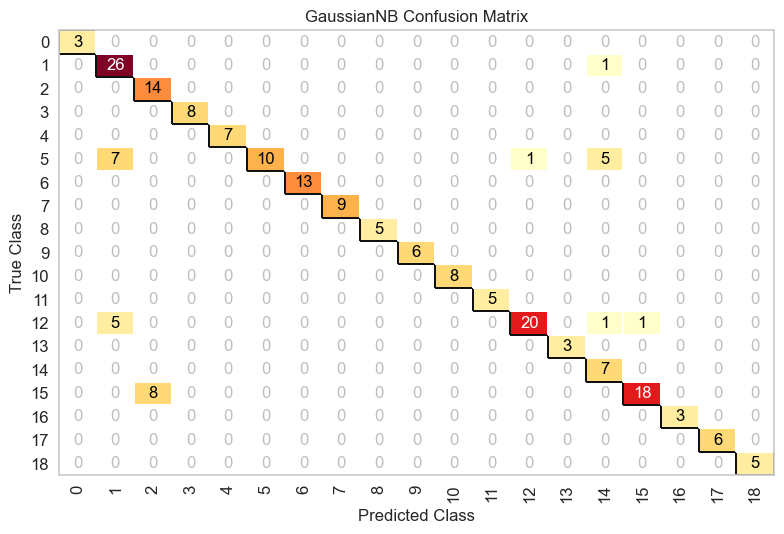

85.85365853658537

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 

naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

#naive_bayes.predict(X_teste)

#confusion_matrix(y_teste, naive_bayes.predict(X_teste))

acertoNB = accuracy_score(y_teste, naive_bayes.predict(X_teste))

v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

acertoNB*100

<h1>Importação de bibliotecas necessárias para criação do modelo de Árvore de Decisão e criação de gráfico da matriz de confusão

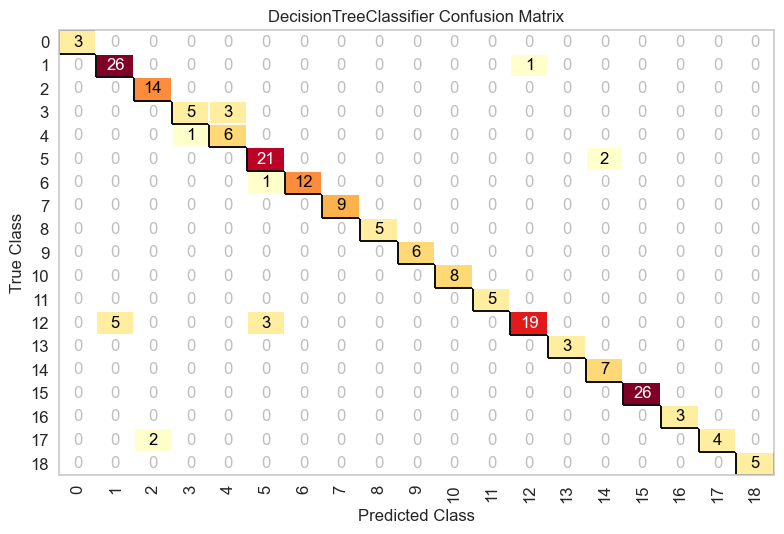

0.8975609756097561

In [84]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

#arvore.predict(X_teste)

#confusion_matrix(y_teste, arvore.predict(X_teste))

acertoArvore = accuracy_score(y_teste, arvore.predict(X_teste))

plot_arvore = ConfusionMatrix(DecisionTreeClassifier())
plot_arvore.fit(X_treinamento, y_treinamento)
plot_arvore.score(X_teste, y_teste)
plot_arvore.poof()
acertoArvore

<h1>Importação de bibliotecas necessárias para criação do modelo de SVM e criação de gráfico da matriz de confusão

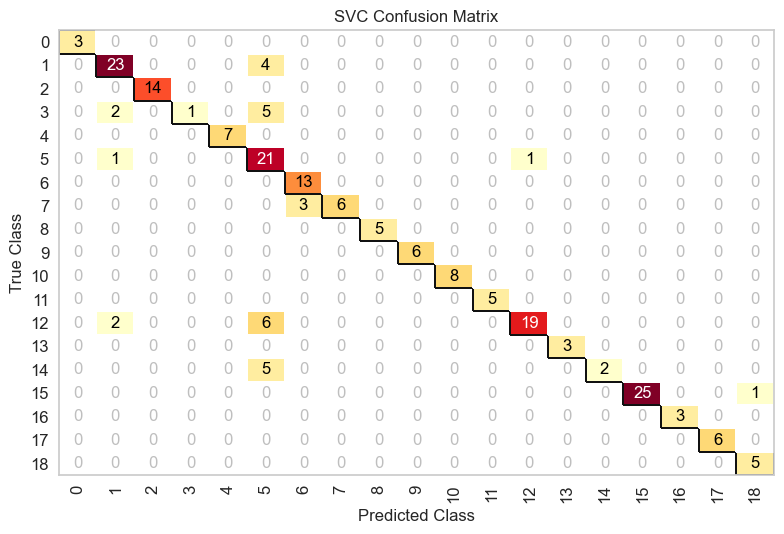

0.8536585365853658

In [85]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_treinamento, y_treinamento)

#svm.predict(X_teste)

#confusion_matrix(y_teste, svm.predict(X_teste))

acertoSvm = accuracy_score(y_teste, svm.predict(X_teste))


plot_svm = ConfusionMatrix(SVC())
plot_svm.fit(X_treinamento, y_treinamento)
plot_svm.score(X_teste, y_teste)
plot_svm.poof()
acertoSvm

<h1>Importação de bibliotecas necessárias para criação do modelo de Random Forest e criação de gráfico da matriz de confusão

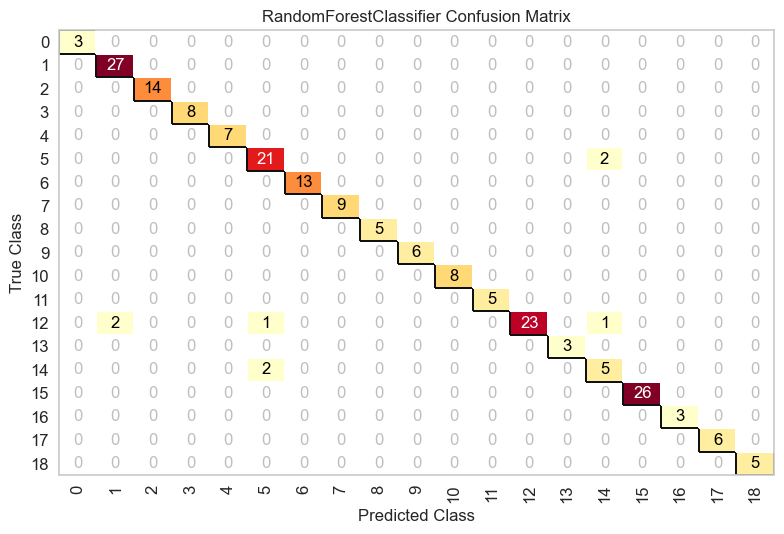

0.9560975609756097

In [86]:
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)

#floresta.predict(X_teste)

#confusion_matrix(y_teste, floresta.predict(X_teste))

acertoFloresta = accuracy_score(y_teste, floresta.predict(X_teste))
plot_floresta = ConfusionMatrix(RandomForestClassifier())
plot_floresta.fit(X_treinamento, y_treinamento)
plot_floresta.score(X_teste, y_teste)
plot_floresta.poof()

acertoFloresta

<h1>Criação de dataframe com a taxa de acerto dos diferentes modelos

In [87]:
data = {
    'Nome': ['Random Forest', 'SVM', 'Decision Tree', 'Naive Bayes'],
    'Accuracy': [acertoFloresta*100, acertoSvm*100, acertoArvore*100, acertoNB*100]
}
acertos = pd.DataFrame(data).sort_values(by='Accuracy', ascending=False)
acertos

,Nome,Accuracy
0,Random Forest,95.609756
2,Decision Tree,89.756098
3,Naive Bayes,85.853659
1,SVM,85.365854


<h1>Criação de gráfico com a taxa de acerto dos diferentes modelos

In [88]:
from cutecharts.globals import use_jupyter_lab; use_jupyter_lab()
from cutecharts.charts import Bar
from cutecharts.components import Page


def bar_base() -> Bar:
    chart = Bar("Taxa de Acerto")
    chart.set_options(labels=list(acertos['Nome']), x_label="Classificador", y_label="Acerto", y_tick_count=10)
    chart.add_series("Taxa", list(acertos['Accuracy']))
    return chart


bar_base().render()


page = Page()
page.add(bar_base())
page.render()

In [89]:
page.load_javascript()

In [90]:
page.render_notebook()